In [110]:
import numpy as np
import matplotlib.pyplot as plt
from turb.lesgo_utils import lesgo_data, read_array_from_file, write_array_to_file
from pyutils import plot_utils as pltutils
from pyutils.cartesian import meshgrid
from scipy.fft import fft2, ifft2, fft, ifft
from matplotlib import colors, cm

from datetime import datetime
date_marker = datetime.today().strftime('%Y_%m_%d')


In [111]:
root_dir = '/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST'

dims = [16, 16, 128]
domain = [2*np.pi, np.pi, 1]

ldata = lesgo_data(domain, dims, root_dir, ntheta=3)

t_total = 100000
tstep = 10000
tt = np.arange(0, t_total+1, tstep)

In [112]:
# # Create config template
# ldata._read_lesgoconf('/home/zyou6474/Projects/lesgo_eri/src/lesgo.conf')
# ldata._write_conf('/home/zyou6474/Projects/ERI/notebooks/cases/LST/configs/config_LST_new.ini')

In [113]:
# Read template config
ldata._read_conf('/home/zyou6474/Projects/ERI/notebooks/cases/LST/configs/config_LST.ini')

# Use parabolic velocity profile as IC
xc, yc, zc = ldata.coords
xx, yy, zz = np.meshgrid(xc, yc, zc, indexing='ij')
ldata.data['u_ic'] = zz * (2-zz)
ldata.data['v_ic'] = zz * 0
ldata.data['w_ic'] = zz * 0

# Create single wavenumber theta in each layer as Initial Condition
# mesh = meshgrid(domain, dims)
thetaic_shape = dims*1
thetaic_shape.insert(0, dims[2])
thetaic_shape = tuple(thetaic_shape)
ldata.data['theta_IC'] = np.empty(shape = thetaic_shape) 
for k in range(dims[2]):
    ldata.data['theta_IC'][k] = 0
    ldata.data['theta_IC'][k, :, :, k] = np.sin(xc)[:, np.newaxis] + yc[np.newaxis, :] *0 

# Switch off Scalar source
ldata.config['SCALAR']['source_opt'] = '0'

ldata.config['SCALAR']['ntheta'] = f'{dims[2]}'

In [114]:
ldata._fnames(fmt_ntheta='%.3i')
ldata.write_inputs()
ldata._write_conf('/home/zyou6474/Projects/ERI/notebooks/cases/LST/configs/config_LST%s.ini' % date_marker)

write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/u_velocity.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/v_velocity.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/w_velocity.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.001.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.002.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.003.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.004.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.005.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_LST/inputs/theta.006.IC
write data into /home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/6_L

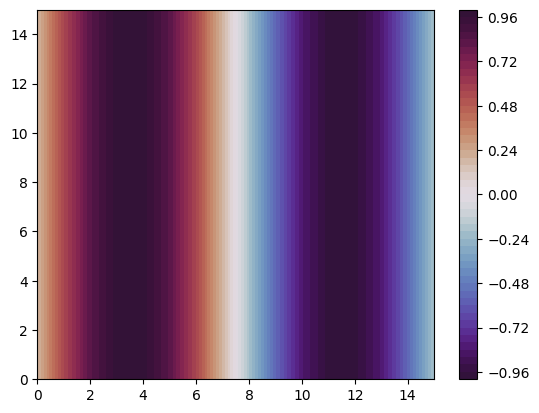

In [115]:
# Check theta ICs
k = 1
plt.contourf(ldata.data['theta_IC'][k, :, :, k].T, norm = colors.Normalize(-1, 1), cmap = cm.twilight_shifted, levels=50)
plt.colorbar()

## LST
[Reference ???]

$$
A\hat{T}_{t=0}^{kx=1, ky=0} = \hat{T}_{t=1}^{kx=1, ky=0}
$$

In [116]:
ic_field = ldata.data['theta_IC'][k, :, :, k]
coef_ic = fft2(ic_field)
print(coef_ic)
kx, ky = np.unravel_index(np.real(coef_ic).argmax(), (dims[0], dims[1]))
print(kx, ky, coef_ic[kx, ky])


[[-4.44089210e-16-0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j]
 [ 2.49715612e+01-1.25540516e+02j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.0000

In [117]:
kx = 1
ky = 0
coef_ic[kx, ky]

(24.9715612180644-125.5405158916135j)

In [118]:
ldata._fnames(fmt_ntheta='%.3i')
ldata.read_data(1)

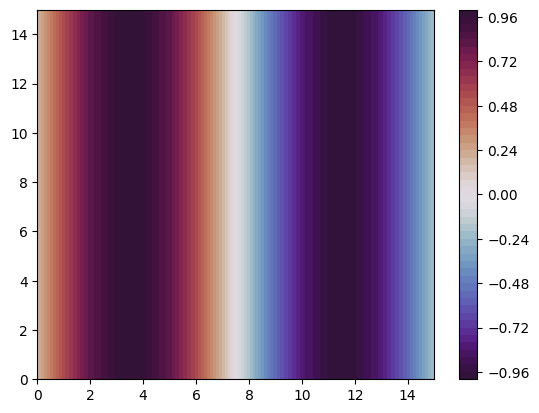

In [119]:
k = 1
plt.contourf(ldata.data['theta'][k, :, :, k].T, norm = colors.Normalize(-1, 1), cmap = cm.twilight_shifted, levels=50)
plt.colorbar()

In [120]:
B = []
for nk in range(ldata.ntheta):
    for k in range(ldata.dims[2]):
      B.append(fft2(ldata.data['theta'][nk, :, :, k])[kx, ky])
      
B = np.reshape(np.array(B), (ldata.ntheta, ldata.dims[2]))
print(B)

[[2.44570011e+01-1.22953662e+02j 1.63736750e-01-8.23160327e-01j
  1.05141936e-03-5.28584268e-03j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [1.67239000e-01-8.40767532e-01j 2.46428562e+01-1.23888049e+02j
  1.58241666e-01-7.95534864e-01j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [1.09682289e-03-5.51410441e-03j 1.61618097e-01-8.12509537e-01j
  2.46561921e+01-1.23955124e+02j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 ...
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 2.49586603e+01-1.25482043e+02j
  5.83249442e-03-2.93234214e-02j 1.36235635e-06-6.84937634e-06j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 5.83569837e-03-2.93395306e-02j
  2.49586723e+01-1.25482107e+02j 5.82985652e-03-2.93101601e-02j]
 [0.000000

In [121]:
I = np.identity(ldata.ntheta) * coef_ic[kx, ky]
A = B @ np.linalg.inv(I)
print( A)

[[ 9.79394267e-01-2.24347911e-08j  6.55692959e-03-1.50198291e-10j
   4.21046753e-05-9.64483481e-13j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 6.69718070e-03-4.64594257e-10j  9.86837172e-01-6.84584907e-08j
   6.33687736e-03-4.39599432e-10j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 4.39229060e-05-5.12642658e-12j  6.47209001e-03-7.55384770e-10j
   9.87371448e-01-1.15240263e-07j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [-0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j ...  9.99532292e-01-9.73019741e-06j
   2.33576901e-04-2.27381283e-09j  5.45589846e-08-5.31118099e-13j]
 [-0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j ...  2.33705219e-04-2.27658776e-09j
   9.99532805e-01-9.73672803e-06j  2.33471267e-

In [122]:
eig, eigv = np.linalg.eig(A)

In [123]:
from scipy.io import loadmat
mat_f = r'./data/LST_template.mat'
mat_data = loadmat(mat_f)

mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'Temperature', 'omega', 'y_phys'])

In [124]:
# from scipy.io import loadmat
# lesgo_f = r'./data/lesgo.mat'
# lesgo_vars = loadmat(lesgo_f)
# print(lesgo_vars.keys())
# eig = lesgo_vars['lambda'][:, 0]
# eigv = lesgo_vars['lesgo_v']



In [125]:
lst = np.log(eig)/1e-5/1j * -1

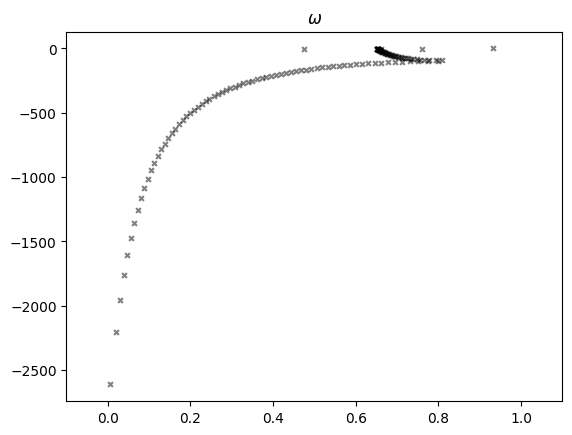

In [126]:
fig, ax = plt.subplots()
ax.scatter(np.real(lst), np.imag(lst), s= 12, marker='x', color='black', alpha=0.5, label='lesgo')
ax.set_xlim(-0.1, 1.1)
ax.set_title(r'$\omega$')
fig.savefig('./imgs/omega.png',  bbox_inches='tight')

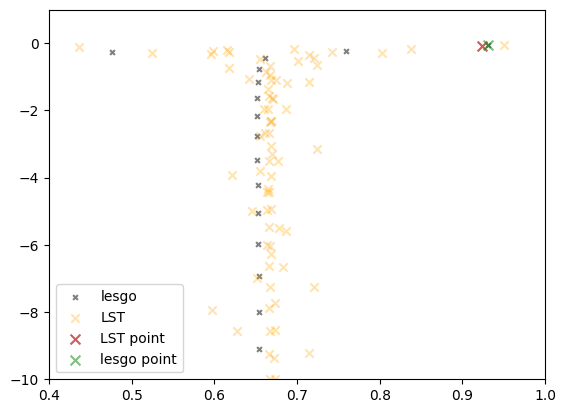

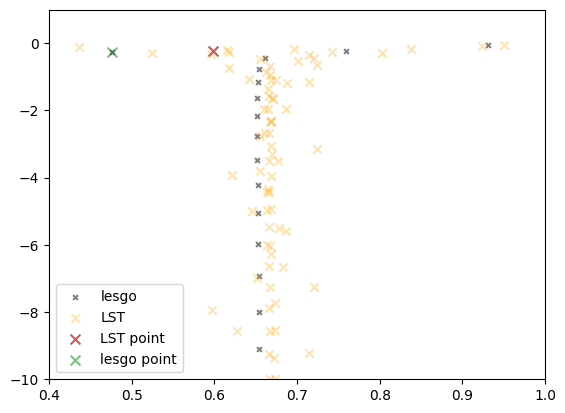

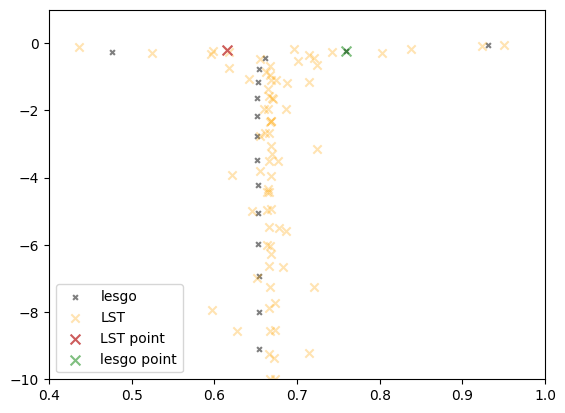

In [127]:
lesgo_indset = [68, 67, 69]
lst_indset = [119, 144, 120]


for ind, _ in enumerate(lesgo_indset):
    fig, ax = plt.subplots()
    
    scatter_set = []
    scatter_set.append(ax.scatter(np.real(lst), np.imag(lst), s= 12, marker='x', color='black', alpha=0.5, label='lesgo'))
    scatter_set.append(ax.scatter(np.real(mat_data['omega']), np.imag(mat_data['omega']), marker='x', color='orange', alpha=0.3, label='LST'))
    # scatter_set.append(ax.scatter(np.real(mat_data['omega'][120, 0]), np.imag(mat_data['omega'][120, 0]), marker='x', color='indianred', label='LST discrete'))
    # scatter_set.append([ax.scatter(np.real(mat_data['omega'][ind, 0]), np.imag(mat_data['omega'][ind, 0]), s= 50, marker='x', color='indianred', label='LST boundary') for ind in lst_indset][0])
    # scatter_set.append([ax.scatter(np.real(lst[ind]), np.imag(lst[ind]), s= 50, marker='x', color='navy', alpha=0.5, label='lesgo boundary') for ind in lesgo_indset][0])
    scatter_set.append(ax.scatter(np.real(mat_data['omega'][lst_indset[ind], 0]), np.imag(mat_data['omega'][lst_indset[ind], 0]), s= 50, marker='x', color='indianred', label='LST point'))
    scatter_set.append(ax.scatter(np.real(lst[lesgo_indset[ind]]), np.imag(lst[lesgo_indset[ind]]), s= 50, marker='x', color='g', alpha=0.5, label='lesgo point'))

    ax.set_ylim(-10, 1)
    ax.set_xlim(0.4, 1)

    labs = [l.get_label() for l in scatter_set]
    ax.legend(scatter_set, labs, loc=0)
    fig.savefig('./imgs/omega_lesgo%.3i_LST%.3i.png' %(lesgo_indset[ind], lst_indset[ind]), bbox_inches='tight')

In [128]:
print(np.argwhere(np.imag(mat_data['omega'][:, 0])>-0.3))
mat_data['omega'][np.imag(mat_data['omega'][:, 0])>-0.3, 0]

[[  3]
 [  8]
 [ 19]
 [ 59]
 [ 60]
 [ 89]
 [ 90]
 [119]
 [120]
 [144]
 [145]]


array([0.43689419-0.12350871j, 0.74182772-0.25251338j,
       0.69650517-0.17349471j, 0.95100985-0.05024926j,
       0.61755299-0.27288752j, 0.83786341-0.16007931j,
       0.52480465-0.2964694j , 0.92337223-0.07462662j,
       0.61500598-0.20821216j, 0.5980823 -0.2379818j ,
       0.80321021-0.28096161j])

In [129]:
print(np.argwhere(np.imag(lst)>-0.3))
lst[np.imag(lst)>-0.3]

[[67]
 [68]
 [69]]


array([0.47567974-0.24608174j, 0.93082274-0.04644036j,
       0.75918003-0.22000113j])

In [130]:
y_phys = np.cos(np.linspace(0, np.pi, 384))

In [131]:
x = np.linspace(0, 1, 100)
dx = x[-1] - x[-2::-1]
x = np.append(x, x[-1] + dx)
x.shape
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [132]:
def plot_sym(ax, x, y, **kwargs):
    dx = x[-1] - x[-2::-1]
    x = np.append(x, x[-1] + dx)
    y = np.append(y, y[-2::-1])
    ax.plot(x, y, **kwargs)
    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


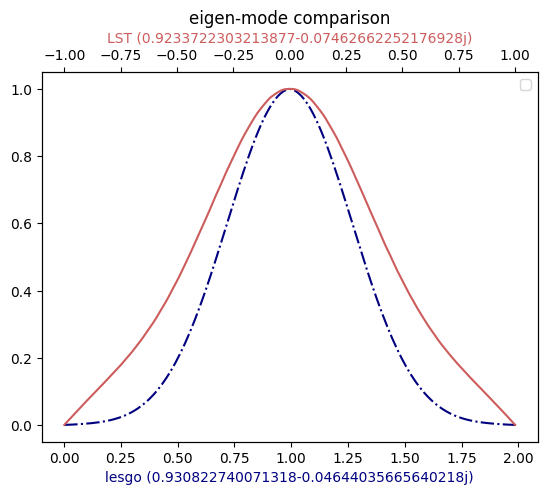

In [133]:
ind = 68
LST_ind = 119
fig, ax = plt.subplots()
ax1 = ax.twiny()
# ax.plot(zc, eigv[:, ind], color='navy', linestyle='-.')
plot_sym(ax, zc, np.abs(eigv[:, ind])/np.max(np.abs(eigv[:, ind])), color='navy', linestyle='-.')
ax.set_xlabel(f'lesgo {lst[ind]}', color='navy')

ax1.plot(y_phys, np.abs(mat_data['Temperature'][:, LST_ind])/np.max(np.abs(mat_data['Temperature'][:, LST_ind])), color='indianred',)
ax1.set_xlabel(f'LST %s' % str(mat_data['omega'][LST_ind, 0]), color='indianred')

ax.set_title('eigen-mode comparison')
ax.legend()
fig.savefig('./imgs/one_wave.png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


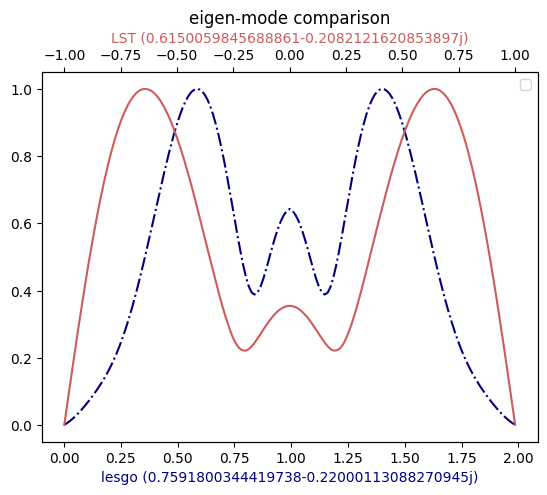

In [134]:
ind = 69
LST_ind = 120
fig, ax = plt.subplots()
ax1 = ax.twiny()
# ax.plot(zc, eigv[:, ind], color='navy', linestyle='-.')
plot_sym(ax, zc, np.abs(eigv[:, ind])/np.max(np.abs(eigv[:, ind])), color='navy', linestyle='-.')
ax.set_xlabel(f'lesgo {lst[ind]}', color='navy')

ax1.plot(y_phys, np.abs(mat_data['Temperature'][:, LST_ind])/np.max(np.abs(mat_data['Temperature'][:, LST_ind])), color='indianred',)
ax1.set_xlabel(f'LST %s' % str(mat_data['omega'][LST_ind, 0]), color='indianred')

ax.set_title('eigen-mode comparison')
ax.legend()
fig.savefig('./imgs/three_wave.png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


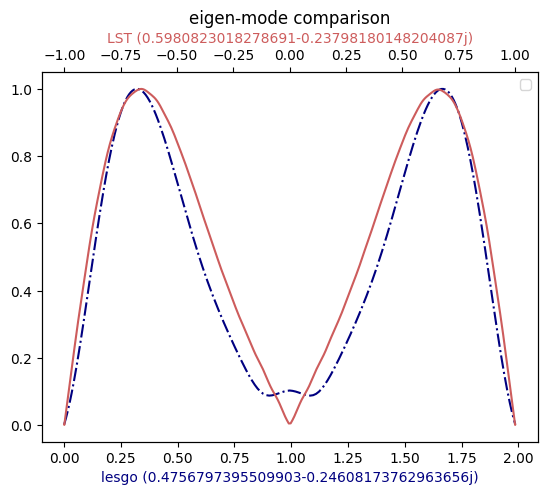

In [135]:
ind = 67
LST_ind = 144
fig, ax = plt.subplots()
ax1 = ax.twiny()
# ax.plot(zc, eigv[:, ind], color='navy', linestyle='-.')
plot_sym(ax, zc, np.abs(eigv[:, ind])/np.max(np.abs(eigv[:, ind])), color='navy', linestyle='-.')
ax.set_xlabel(f'lesgo {lst[ind]}', color='navy')

ax1.plot(y_phys, np.abs(mat_data['Temperature'][:, LST_ind])/np.max(np.abs(mat_data['Temperature'][:, LST_ind])), color='indianred',)
ax1.set_xlabel(f'LST %s' % str(mat_data['omega'][LST_ind, 0]), color='indianred')

ax.set_title('eigen-mode comparison')
ax.legend()
fig.savefig('./imgs/two_wave.png', bbox_inches='tight')